## Question 1

1. We are using Python program to create a "Russian Roulette" game, where one bullet is loaded in the chamber of a revolver, and the player is shooting himself in up to 6 rounds. If the player hits an empty shot, print the sound effect "click". If the player hit a lethal shot, then print "Bang" and terminate the game. The round of the lethal shot is determined by a random number, generated by the function `randint()` from the module "numpy.random". The help information of this function is given as follows.

---
```
randint(...) method of numpy.random.mtrand.RandomState instance
    randint(low, high=None, size=None, dtype=int)
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    .. note::
        New code should use the ``integers`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    low : int or array-like of ints
        Lowest (signed) integers to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int or array-like of ints, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distribution (see above for behavior if ``high=None``).
        If array-like, must contain integer values
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    dtype : dtype, optional
        Desired dtype of the result. Byteorder must be native.
        The default value is int.
    
        .. versionadded:: 1.11.0
    
    Returns
    -------
    out : int or ndarray of ints
        `size`-shaped array of random integers from the appropriate
        distribution, or a single such random int if `size` not provided.
```
---

Which of the following code is correct in creating the game? (Ans: B)

    A. 
---
```python
import numpy as np

lethal_shot = np.random.randint(1, 7)
for n in range(6):
    if n < lethal_shot:
        print('Click!')
    else:
        print('Bang')
        break
```
---

    B.
---
```python
import numpy as np

lethal_shot = np.random.randint(low=6)
for n in range(6):
    if n < lethal_shot:
        print('Click!')
    else:
        print('Bang')
        break
```
---

    C. 
---
```python
import numpy as np

lethal_shot = np.random.randint(1, 7)
for n in range(6):
    if n == lethal_shot:
        print('Bang')
        break
    else:
        print('Click')
```
---

    D. 
---
```python
import numpy as np

lethal_shot = np.random.randint(high=6)
for n in range(6):
    if n == lethal_shot:
        print('Bang')
        break
    else:
        print('Click')
```
---

In [9]:
import numpy as np

lethal_shot = np.random.randint(low=6)
print(lethal_shot)
for n in range(6):
    if n < lethal_shot:
        print('Click!')
    else:
        print('Bang')
        break

4
Click!
Click!
Click!
Click!
Bang


## Question 2

Suppose that the daily log returns on a stock are independent and normally distributed with mean 0.001 and standard deviation 0.015. If at time $t=1$, you buy $Q_1=\$1000$ worth of this stock, then after 50 trading days (e.g. $t=51$), the profit is expressed as $Q_{51} - Q_1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats

1. What is the probability that the profit is higher than $\$120$? Use probability theory to calculate the exact value of the probability, and use simulation find the approximated value.

**Solution**:

The summation of log returns of the 50 days are:

$$
z = r_2 + r_3 + ... + r_{50} = \log\left(\frac{Q_2}{Q_1}\frac{Q_3}{Q_2}...\frac{Q_{51}}{Q_{50}}\right) = \log\left(\frac{Q_{51}}{Q_1}\right),
$$

where the random variable $z$ follows a normal distribution, and its mean and standard deviations are calculated below.

In [10]:
mean_z = 0.001 * 50
std_z = 0.015 * (50**0.5)

print(f'The mean value: {mean_z}')
print(f'The standard deviation: {std_z}')

The mean value: 0.05
The standard deviation: 0.10606601717798213


The probability can be written as

$$
\begin{align}
P(Q_{51} - Q_1 \geq 120) =& P(Q_{51} \geq Q_1 + 120) = P\left(\frac{Q_{51}}{Q_1} \geq 1 + \frac{120}{Q_1}\right) \\
=& P\left(\log\left(\frac{Q_{51}}{Q_1}\right) \geq \log\left(1 + \frac{120}{Q_1}\right)\right) \\
=& P\left(z\geq \log\left(1 + \frac{120}{Q_1}\right)\right),
\end{align}
$$

and the calculation is conducted by the following code.

In [11]:
q1 = 1000
prob = 1 - norm.cdf(np.log(1+120/q1), mean_z, std_z)

print(f'The probability: {prob}')

The probability: 0.2752308001683129


We can also use Monte Carlo simulation to obtain the approximated value of the probability. Note that the worth of the stock at time $t=51$ is written as

$$
Q_{51} = Q_1\exp(r_2 + r_3 ... + r_{51}),
$$

so we can generate random samples to represent the log returns of these 50 trading days for calculating the values of $Q_{51}$.

In [15]:
smp_size = 100000
num_days = 50

q1 = 1000
log_returns = np.random.normal(0.001, 0.015, size=(smp_size, num_days))
print("Log returns: ", log_returns)
q51 = q1 * np.exp(log_returns.sum(axis=1))
print("Q51: ", q51)

Log returns:  [[-0.00055071 -0.02539356  0.00342452 ... -0.01234265  0.00896074
  -0.0080917 ]
 [-0.00157817  0.01136317 -0.01139438 ... -0.00924751 -0.03177738
  -0.01521263]
 [ 0.00586595  0.01370765 -0.00481677 ...  0.03149938  0.0018597
   0.03606742]
 ...
 [ 0.0295648   0.00372196 -0.00180649 ... -0.00473016  0.00439092
   0.01263614]
 [ 0.01152009  0.01989982  0.00649903 ... -0.02496322 -0.00424558
  -0.00309494]
 [ 0.0370669  -0.00605315 -0.00117439 ... -0.0039271  -0.01449855
   0.02565583]]
Q51:  [ 951.67294153  940.90820349  975.59902813 ... 1098.86850475 1098.03553322
 1085.0649104 ]


The probability can be approximated by the sample proportion value.

In [16]:
prob = (q51 - q1 > 120).mean()

print(f'The probability: {prob}')

The probability: 0.27603


2. Notice that the value of the stock at time $t$ can be written as $Q_t = Q_1 \exp(r_2 + r_3 + ... + r_t)$, we can obtain a random sample of daily stock values from $t=2$ to $t=51$, using the `cumsum()` function. 

In [19]:
smp_size = 100000
num_days = 50

q1 = 1000
log_returns = np.random.normal(0.001, 0.015, size=(smp_size, num_days))
qs = q1 * np.exp(np.cumsum(log_returns, axis=1))
# q51 = q1 * np.exp(log_returns.sum(axis=1))

print(qs.shape, q51.shape)
qs


(100000, 50) (100000,)


array([[ 992.95644814, 1009.60955753, 1045.16254629, ..., 1208.93765896,
        1231.2620395 , 1240.17149133],
       [ 978.13638459,  967.81308316,  978.46739287, ..., 1136.05174576,
        1144.86746733, 1139.78137248],
       [1006.6608423 ,  994.42100216, 1003.18218985, ...,  819.72227165,
         823.08988188,  820.77516523],
       ...,
       [1013.40172658,  995.38473165,  983.57572993, ..., 1030.38748326,
        1008.53669072, 1005.39359792],
       [1000.24224964, 1005.63497488, 1021.07014225, ...,  977.39286042,
         975.67636851,  991.28652429],
       [1023.43134155, 1044.86460163, 1061.84936744, ..., 1123.22427366,
        1126.10954776, 1140.77036755]])

Here, the sample of stock values are given as a two-dimensional array `qs`, where the rows (axis 0) are each of the samples, and the columns (axis 1) represent each of the trading days. The following code is used to visualize the stock value trends of the first ten records of the random sample.

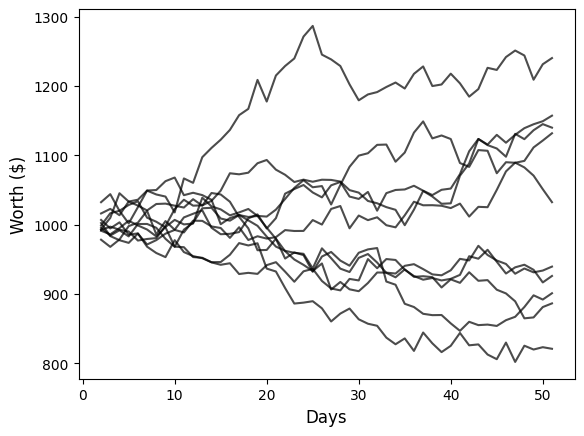

In [20]:
num_days = 51
days = np.arange(2, num_days+1)

for i in range(10):
    plt.plot(days, qs[i], color='k', alpha=0.7)

plt.xlabel('Days', fontsize=12)
plt.ylabel('Worth ($)', fontsize=12)
plt.show()

Use proper data visuals to compare the distributions of $Q_{51}$ and $Q_{21}$. 

**Solution**:

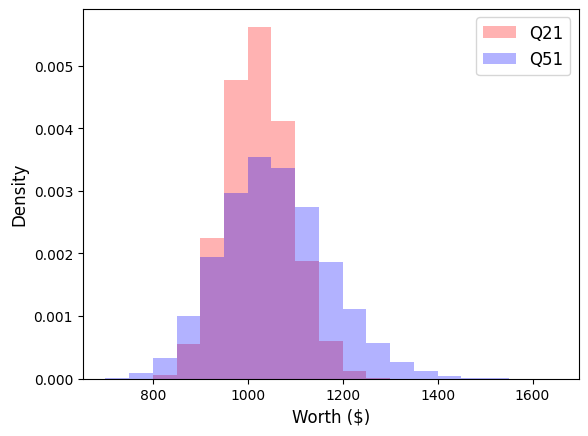

In [21]:
q21 = qs[:, 19]
q51 = qs[:, -1]

bins = np.arange(700, 1700, 50)
plt.hist(q21, bins=bins, density=True, 
         color='r', alpha=0.3, label='Q21')
plt.hist(q51, bins=bins, density=True, 
         color='b', alpha=0.3, label='Q51')
plt.legend(fontsize=12)
plt.xlabel('Worth ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

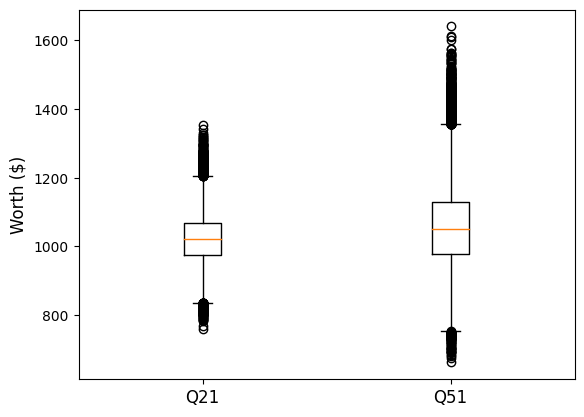

In [22]:
plt.boxplot([q21, q51], labels=['Q21', 'Q51'])
plt.xticks(fontsize=12)
plt.ylabel('Worth ($)', fontsize=12)
plt.show()

3. Does $Q_{51}$ follow a normal distribution?

**Solution**:

The Q-Q plot is created below.

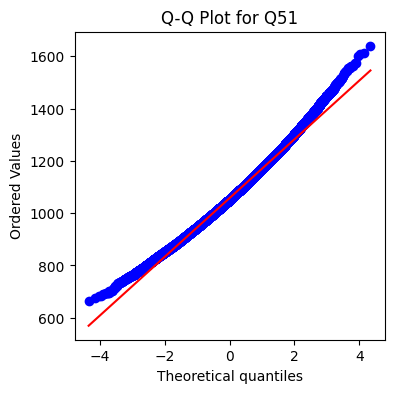

In [23]:
plt.figure(figsize=(4, 4))
stats.probplot(q51, plot=plt)
plt.title(f'Q-Q Plot for Q51')
plt.show()

It can be seen that $Q_{51}$ is not normally distributed. 

4. Now suppose you buy $\$10,000$ of this stock and used $\$1000$ of your own money and the other $\$9000$ in borrowed money. If the value of the stock falls below $\$9000$ at any trading day, then you have to sell the stock and repay the loan. What is the probability that the stock falls below $\$9000$ at any trading day between $t=2$ and $t=51$? 

**Solution**:

We can generate the random sample of stock values for these 50 trading days.

In [26]:
smp_size = 100000
days = 50

q1 = 10000                 
log_returns = np.random.normal(0.001, 0.015, size=(smp_size, days))
qs = q1 * np.exp(np.cumsum(log_returns, axis=1))
qs.shape

(100000, 50)

We are in fact looking for the probability that the minimum value of the stock within the 50 days is below $\$9000$.

In [27]:
prob = (qs.min(axis=1) < 9000).mean()

print(f'The probability: {prob}')

The probability: 0.1591


## Question 3

Suppose that in Singapore, $p=0.62$ of all population prefer Coke over Pepsi, and the remaining $1-p=0.38$ prefer Pepsi over Coke. A local fast food company does not have the data, so they decide to randomly survey $n=50$ customers for their preference, and use the sample proportion $\hat{p}=\frac{m}{n}$ ($m$ is the number of surveyed customer who prefer Coke) to approximate the population parameter $p$. 

1. What is the expected value of the sample proportion $\hat{p}$?

**Solution**:

The expected value:
$$
\mathbb{E}(\hat{p}) = \mathbb{E}\left(\frac{m}{n}\right) = \frac{\mathbb{E}(m)}{n},
$$

where $m$ follow a binomial distribution with $n$ experiments and the probability is $p$, so $\mathbb{E}(m) = np$. As a result, $\mathbb{E}(\hat{p})=p$.

2. Plot the sampling distribution of the sample proportion $\hat{p}$.

**Solution**:

Note that the variable $m$ follows a binomial distribution, the distribution of $\hat{p}=\frac{m}{n}$ also follows a binomial distribution, but all x-data are divided by $n$.

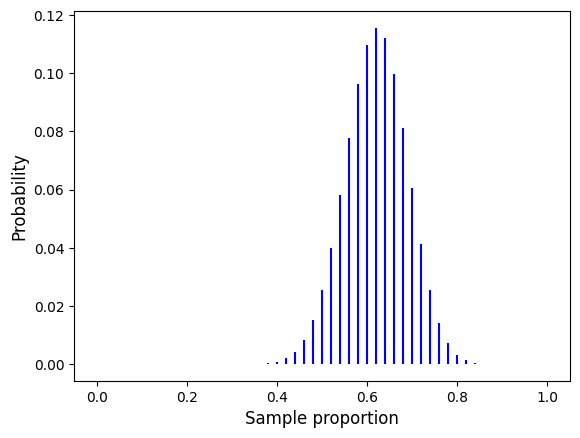

In [28]:
from scipy.stats import binom

n = 50
p = 0.62

m = np.arange(0, n+1)
phat = m/n
pmf = binom.pmf(m, n, p)

plt.vlines(phat, 0, pmf, color='b')
plt.xlabel('Sample proportion', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.show()